# Análsis Exploratorio de precios de compras y ventas Supermercado La Osa - Madrid

## Objetivos de este Análisis Exploratorio de Datos
### 1. Analisis exploratorio de los datos por tipos de productos, categorias y proveedores, tanto en compra como en venta de los mismo en el supermercado La Osa.
### 2. Visualizacion de los datos 
### Creación de un dashboard o  una herramienta interactiva de facil utilizacion por parte de los administradores del supermercado



## ASPECTOS OPCIONALES A PARTIR DE ESTE EDA
### 1. Predecir los valores de venta y /o de inflacion para los siguiente meses (o año)
### 2. Analisis de series temporales 

## Asunciones de la primer reunión con el stakeholder
* #### ¿A que precio compra la OSA sus productos?
* #### ¿Hay algun producto, categoria o proveedor que los precios sean mas altos?
* #### ¿Cual es la implicacion en la canasta del comprador, la subida de precios de los productos que compra la Osa?
* #### Analizar los productos que mas se consumen en la cesta familiar y su precio (de compra y venta?)
* #### Variacion de los precios de cada producto y cada categoría
* #### ¿Cómo afecta esta variación de los productos en la compra de los usuarios?
* #### Agrupar las comnpras por tipos de productos, categorías, tipo de comprador

In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Datos de compras y ventas de productos

### Importamos el dataset organizado con las compars y ventas de productos de La Osa.

In [116]:
#Datasets de compra de productos a proveedores 2021-2022
df= pd.read_csv("data_compra_venta_2021_2022_LaOsa.csv")
df.head(10)

/var/folders/2z/y9k9szx937n84ztg148l8rd00000gn/T/ipykernel_54352/1642221996.py:2: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("data_compra_venta_2021_2022_LaOsa.csv")


,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra,Cantidad_venta,Precio_medio_venta,Fecha_venta,Año_ventas,Mes_ventas
0,1637.0,Envase Veer 33cl,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",Eco,(VEER) MISSON S.COOP.CYL.,2022-06-29 21:10:50,0.15,2022.0,6.0,0.0,0.0,NaN,0.0,0.0
1,1637.0,Envase Veer 33cl,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",Eco,(VEER) MISSON S.COOP.CYL.,2022-06-29 20:25:26,0.15,2022.0,6.0,0.0,0.0,NaN,0.0,0.0
2,1637.0,Envase Veer 33cl,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",Eco,(VEER) MISSON S.COOP.CYL.,2022-06-29 18:47:47,0.15,2022.0,6.0,0.0,0.0,NaN,0.0,0.0
3,1637.0,Envase Veer 33cl,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",Eco,(VEER) MISSON S.COOP.CYL.,2022-06-28 19:37:37,0.15,2022.0,6.0,0.0,0.0,NaN,0.0,0.0
4,1637.0,Envase Veer 33cl,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",Eco,(VEER) MISSON S.COOP.CYL.,2022-06-28 19:32:07,0.15,2022.0,6.0,0.0,0.0,NaN,0.0,0.0
5,1637.0,Envase Veer 33cl,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",Eco,(VEER) MISSON S.COOP.CYL.,2022-06-28 12:48:35,0.15,2022.0,6.0,0.0,0.0,NaN,0.0,0.0
6,1637.0,Envase Veer 33cl,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",Eco,(VEER) MISSON S.COOP.CYL.,2022-06-26 14:19:06,0.15,2022.0,6.0,0.0,0.0,NaN,0.0,0.0
7,1637.0,Envase Veer 33cl,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",Eco,(VEER) MISSON S.COOP.CYL.,2022-06-25 12:24:26,0.15,2022.0,6.0,0.0,0.0,NaN,0.0,0.0
8,1637.0,Envase Veer 33cl,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",Eco,(VEER) MISSON S.COOP.CYL.,2022-06-24 15:36:09,0.15,2022.0,6.0,0.0,0.0,NaN,0.0,0.0
9,1637.0,Envase Veer 33cl,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",Eco,(VEER) MISSON S.COOP.CYL.,2022-06-24 14:13:46,0.15,2022.0,6.0,0.0,0.0,NaN,0.0,0.0


In [117]:
df.columns

Index(['ID_producto', 'Nombre_producto', 'Categoria_producto', 'Tipo_producto',
       'Proveedor_producto', 'Fecha_compra', 'Coste_compra', 'Año_compra',
       'Mes_compra', 'Cantidad_venta', 'Precio_medio_venta', 'Fecha_venta',
       'Año_ventas', 'Mes_ventas'],
      dtype='object')

> #### Las columnas o variables de nuestro dataset son:

* **ID_producto:** Corresponde a Producto/Referencia interna
* **Nombre_producto:** Corresponde a Producto/Nombre
* **Categoria_producto:** Corresponde a Producto/Categoría de producto/Nombre a mostrar
* **Tipo_producto:** Corresponde a Producto/Cuenta analítica para gastos/Nombre a mostrar
* **Proveedor_producto:** Corresponde a Producto/Proveedores/Nombre a mostrar
* **Fecha_compra:** Fecha de compra del producto
* **Coste_compra:** Coste de compra del producto
* **Cantidad_venta:** Unidades vendidas del producto
* **Precio_medio_venta:** Precio promedio de venta del producto en el mes
* **Fecha_venta:** Mes y año de venta del producto 
* **Año_venta:** Año de venta del producto
* **Mes_venta:** Mes de venta del producto

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204988 entries, 0 to 204987
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID_producto         204988 non-null  float64
 1   Nombre_producto     204988 non-null  object 
 2   Categoria_producto  204988 non-null  object 
 3   Tipo_producto       204988 non-null  object 
 4   Proveedor_producto  204988 non-null  object 
 5   Fecha_compra        111268 non-null  object 
 6   Coste_compra        204988 non-null  float64
 7   Año_compra          204988 non-null  float64
 8   Mes_compra          204988 non-null  float64
 9   Cantidad_venta      204988 non-null  float64
 10  Precio_medio_venta  204988 non-null  float64
 11  Fecha_venta         93720 non-null   object 
 12  Año_ventas          204988 non-null  float64
 13  Mes_ventas          204988 non-null  float64
dtypes: float64(8), object(6)
memory usage: 21.9+ MB


### Chequeamos los tipos de datos de cada columna/variable del dataset

In [119]:
df.dtypes

ID_producto           float64
Nombre_producto        object
Categoria_producto     object
Tipo_producto          object
Proveedor_producto     object
Fecha_compra           object
Coste_compra          float64
Año_compra            float64
Mes_compra            float64
Cantidad_venta        float64
Precio_medio_venta    float64
Fecha_venta            object
Año_ventas            float64
Mes_ventas            float64
dtype: object

## Vamos a cambiar los formatos del tipo de datos de algunas columnas 

* Se cambian la columna ID_producto a tipo de dato `object`: 

`ID_producto`

* Se cambian las columnas de fechas a tipo de dato `datetime64[ns]`: 

`Fecha_compra` , `Fecha_venta`, 

* Se cambian los años y meses a tipo de dato `int`: 

`Año_venta`, `Mes_venta` `Año_compra`, `Mes_compra` 

### Se cambia el `ID_producto` a tipo de dato `object`

In [120]:
df.ID_producto = df.ID_producto.astype('object')
df.Fecha_compra = df.Fecha_compra.astype('datetime64[ns]')
df.Fecha_venta = df.Fecha_venta.astype('datetime64[ns]')
df.Año_ventas = df.Año_ventas.astype('int')
df.Mes_ventas = df.Mes_ventas.astype('int')
df.Año_compra = df.Año_compra.astype('int')
df.Mes_compra = df.Mes_compra.astype('int')
df.dtypes

ID_producto                   object
Nombre_producto               object
Categoria_producto            object
Tipo_producto                 object
Proveedor_producto            object
Fecha_compra          datetime64[ns]
Coste_compra                 float64
Año_compra                     int64
Mes_compra                     int64
Cantidad_venta               float64
Precio_medio_venta           float64
Fecha_venta           datetime64[ns]
Año_ventas                     int64
Mes_ventas                     int64
dtype: object

In [121]:
df.isnull().sum()

ID_producto                0
Nombre_producto            0
Categoria_producto         0
Tipo_producto              0
Proveedor_producto         0
Fecha_compra           93720
Coste_compra               0
Año_compra                 0
Mes_compra                 0
Cantidad_venta             0
Precio_medio_venta         0
Fecha_venta           111268
Año_ventas                 0
Mes_ventas                 0
dtype: int64

### Vamos a revisar los valores nulos que se produjeron al hacer el merge entre los datasets de compra y venta.
* Para los nulos en tipo de productos, categoria y proveedor hay que buscar la manera de complementar esta información faltante.
* Los nulos en ventas se rellenaran con cero

#### Los nulos en ventas se rellenaran con cero

#### Los nulos en tipo de productos, categoria y proveedor se rellenaran con 'Falta completar'.

In [122]:
df.columns

Index(['ID_producto', 'Nombre_producto', 'Categoria_producto', 'Tipo_producto',
       'Proveedor_producto', 'Fecha_compra', 'Coste_compra', 'Año_compra',
       'Mes_compra', 'Cantidad_venta', 'Precio_medio_venta', 'Fecha_venta',
       'Año_ventas', 'Mes_ventas'],
      dtype='object')

In [123]:
# reemplace los valores faltantes en tres columnas con tres valores diferentes 
df.fillna ({'Fecha_compra': 'NN', 
            'Fecha_venta': 'NN'},
           inplace = True )
df.isnull().sum()

ID_producto           0
Nombre_producto       0
Categoria_producto    0
Tipo_producto         0
Proveedor_producto    0
Fecha_compra          0
Coste_compra          0
Año_compra            0
Mes_compra            0
Cantidad_venta        0
Precio_medio_venta    0
Fecha_venta           0
Año_ventas            0
Mes_ventas            0
dtype: int64

### Aqui tenemos un pequeño problema:
* no podemos tener datetime en columnas con ceros
* asi que tenemos que escoger entre tener fechas con nulos  y formato datetime
o tener fecha sin nulos  pero no se puede en formato datetime

In [124]:
df.dtypes

ID_producto            object
Nombre_producto        object
Categoria_producto     object
Tipo_producto          object
Proveedor_producto     object
Fecha_compra           object
Coste_compra          float64
Año_compra              int64
Mes_compra              int64
Cantidad_venta        float64
Precio_medio_venta    float64
Fecha_venta            object
Año_ventas              int64
Mes_ventas              int64
dtype: object

### Vamos a observar los valores o categorías únicas por cada columna categórica:

In [125]:
for i in df.columns:
    print('{} --------------------------> {}'.format(i, df[i].nunique()))

ID_producto --------------------------> 4851
Nombre_producto --------------------------> 4867
Categoria_producto --------------------------> 132
Tipo_producto --------------------------> 4
Proveedor_producto --------------------------> 128
Fecha_compra --------------------------> 9027
Coste_compra --------------------------> 1373
Año_compra --------------------------> 3
Mes_compra --------------------------> 13
Cantidad_venta --------------------------> 4840
Precio_medio_venta --------------------------> 4070
Fecha_venta --------------------------> 25
Año_ventas --------------------------> 3
Mes_ventas --------------------------> 13


In [126]:
df.columns

Index(['ID_producto', 'Nombre_producto', 'Categoria_producto', 'Tipo_producto',
       'Proveedor_producto', 'Fecha_compra', 'Coste_compra', 'Año_compra',
       'Mes_compra', 'Cantidad_venta', 'Precio_medio_venta', 'Fecha_venta',
       'Año_ventas', 'Mes_ventas'],
      dtype='object')

### Vamos a evaluar la clasificacion de los productos comprados y vendidos en el supermercado:
* **Tipo de producto** : Es el tipo de empaque del producto, ya sea *ecológico* o *convencional*.
* **Categoria de producto**: Se refiere a la categoría del producto de cara al público.
* **Proveedor de producto**. Se refiere al proveedor del producto, es decir a quién se le compró el producto.

### Vamos a organizar el dataframe por orden alfabético de las `Categoria_producto`

In [127]:
df = df.sort_values("Categoria_producto")

In [128]:
#Reseteamos el index
df = df.reset_index()
df

,index,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra,Cantidad_venta,Precio_medio_venta,Fecha_venta,Año_ventas,Mes_ventas
0,109418,4721.0,AJUSTE 31/12/20,All,False,False,2021-05-24 14:49:31,0.00,2021,5,0.0,0.0,NN,0,0
1,109419,4721.0,AJUSTE 31/12/20,All,False,False,2021-05-24 14:49:31,0.00,2021,5,0.0,0.0,NN,0,0
2,67572,3168.0,Estropajo vegetal Dicha&Hecho 1 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,(DICHA & HECHO) ANA GUERRERO ALONSO,2022-04-08 10:01:15,1.93,2022,4,0.0,0.0,NN,0,0
3,67571,3168.0,Estropajo vegetal Dicha&Hecho 1 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,(DICHA & HECHO) ANA GUERRERO ALONSO,2022-06-09 13:39:27,1.62,2022,6,0.0,0.0,NN,0,0
4,85107,5958.0,Estropajo fibra verde Scotch brite,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2022-04-28 18:47:02,1.61,2022,4,0.0,0.0,NN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204983,72303,3384.0,Zumo de zanahoria Delizum 750 ml,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,2021-08-17 09:49:58,1.55,2021,8,0.0,0.0,NN,0,0
204984,72302,3384.0,Zumo de zanahoria Delizum 750 ml,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,2021-09-20 14:15:40,1.55,2021,9,0.0,0.0,NN,0,0
204985,72301,3384.0,Zumo de zanahoria Delizum 750 ml,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,2021-10-26 08:18:57,1.55,2021,10,0.0,0.0,NN,0,0
204986,72299,3384.0,Zumo de zanahoria Delizum 750 ml,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,2022-07-06 12:21:33,1.69,2022,7,0.0,0.0,NN,0,0


In [129]:
df.columns

Index(['index', 'ID_producto', 'Nombre_producto', 'Categoria_producto',
       'Tipo_producto', 'Proveedor_producto', 'Fecha_compra', 'Coste_compra',
       'Año_compra', 'Mes_compra', 'Cantidad_venta', 'Precio_medio_venta',
       'Fecha_venta', 'Año_ventas', 'Mes_ventas'],
      dtype='object')

In [130]:
#Borramos la antigua columna de index
df=df.drop(['index'], axis=1)
df.columns

Index(['ID_producto', 'Nombre_producto', 'Categoria_producto', 'Tipo_producto',
       'Proveedor_producto', 'Fecha_compra', 'Coste_compra', 'Año_compra',
       'Mes_compra', 'Cantidad_venta', 'Precio_medio_venta', 'Fecha_venta',
       'Año_ventas', 'Mes_ventas'],
      dtype='object')

## Tipo de producto

In [131]:
df['Tipo_producto'].value_counts().unique().tolist()

[93720, 78264, 31745, 1259]

In [132]:
df.groupby(['Tipo_producto']).size().sort_values()

Tipo_producto
False               1259
Convencional       31745
Eco                78264
Falta completar    93720
dtype: int64

#### Tenemos un total de:
* 78.264 productos--->  *eco*, 
* 31.745 productos ---> *convencionales*,  y 
* 1.259 productos ---> con *False* que se les debe reasignar un `Tipo_producto`.

In [133]:
df.groupby('Tipo_producto').sum()

/var/folders/2z/y9k9szx937n84ztg148l8rd00000gn/T/ipykernel_54352/1425067881.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Tipo_producto').sum()


,Coste_compra,Año_compra,Mes_compra,Cantidad_venta,Precio_medio_venta,Año_ventas,Mes_ventas
Tipo_producto,,,,,,,
Convencional,81580.81,64167426,206512,0.000,0.000000,0,0
Eco,241699.63,158197230,504799,0.000,0.000000,0,0
False,6460.48,2545194,10037,0.000,0.000000,0,0
Falta completar,0.00,0,0,680690.568,263215.147811,189455328,609180


In [134]:
df.Tipo_producto.unique().tolist()

['False', 'Convencional', 'Eco', 'Falta completar']

### Vamos a ver que productos son catalogados como `Eco`

In [135]:
df.loc[df["Tipo_producto"] == "Eco"]

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra,Cantidad_venta,Precio_medio_venta,Fecha_venta,Año_ventas,Mes_ventas
35,2490.0,Guantes latex desechables talla m la Droguerie...,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Eco,(BIOBIO) BIOBIO PRODUCTOS ECOLOGICOS S.L.,2022-11-17 12:44:04,2.19,2022,11,0.0,0.0,NN,0,0
53,2490.0,Guantes latex desechables talla m la Droguerie...,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Eco,(BIOBIO) BIOBIO PRODUCTOS ECOLOGICOS S.L.,2022-08-18 17:48:49,2.19,2022,8,0.0,0.0,NN,0,0
54,2490.0,Guantes latex desechables talla m la Droguerie...,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Eco,(BIOBIO) BIOBIO PRODUCTOS ECOLOGICOS S.L.,2021-11-26 18:39:56,2.30,2021,11,0.0,0.0,NN,0,0
55,2490.0,Guantes latex desechables talla m la Droguerie...,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Eco,(BIOBIO) BIOBIO PRODUCTOS ECOLOGICOS S.L.,2021-06-09 14:20:47,2.19,2021,6,0.0,0.0,NN,0,0
56,2490.0,Guantes latex desechables talla m la Droguerie...,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Eco,(BIOBIO) BIOBIO PRODUCTOS ECOLOGICOS S.L.,2021-05-20 13:41:03,2.19,2021,5,0.0,0.0,NN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204983,3384.0,Zumo de zanahoria Delizum 750 ml,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,2021-08-17 09:49:58,1.55,2021,8,0.0,0.0,NN,0,0
204984,3384.0,Zumo de zanahoria Delizum 750 ml,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,2021-09-20 14:15:40,1.55,2021,9,0.0,0.0,NN,0,0
204985,3384.0,Zumo de zanahoria Delizum 750 ml,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,2021-10-26 08:18:57,1.55,2021,10,0.0,0.0,NN,0,0
204986,3384.0,Zumo de zanahoria Delizum 750 ml,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,2022-07-06 12:21:33,1.69,2022,7,0.0,0.0,NN,0,0


### Vamos a ver que productos son catalogados como `Convencional`

In [136]:
df.loc[df["Tipo_producto"] == "Convencional"]

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra,Cantidad_venta,Precio_medio_venta,Fecha_venta,Año_ventas,Mes_ventas
2,3168.0,Estropajo vegetal Dicha&Hecho 1 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,(DICHA & HECHO) ANA GUERRERO ALONSO,2022-04-08 10:01:15,1.93,2022,4,0.0,0.0,NN,0,0
3,3168.0,Estropajo vegetal Dicha&Hecho 1 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,(DICHA & HECHO) ANA GUERRERO ALONSO,2022-06-09 13:39:27,1.62,2022,6,0.0,0.0,NN,0,0
4,5958.0,Estropajo fibra verde Scotch brite,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2022-04-28 18:47:02,1.61,2022,4,0.0,0.0,NN,0,0
5,2776.0,Bayeta microfibra Mical 3 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2021-05-27 15:38:36,1.63,2021,5,0.0,0.0,NN,0,0
6,2776.0,Bayeta microfibra Mical 3 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2021-07-22 12:15:12,1.63,2021,7,0.0,0.0,NN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204645,3908.0,Néctar de naranja Granini 1 L,"Seco Envasado / Zumos, leche y bebidas vegetal...",Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2021-04-22 14:41:13,1.30,2021,4,0.0,0.0,NN,0,0
204669,3908.0,Néctar de naranja Granini 1 L,"Seco Envasado / Zumos, leche y bebidas vegetal...",Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2021-01-29 13:46:10,1.30,2021,1,0.0,0.0,NN,0,0
204671,3908.0,Néctar de naranja Granini 1 L,"Seco Envasado / Zumos, leche y bebidas vegetal...",Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2021-04-22 14:41:13,1.30,2021,4,0.0,0.0,NN,0,0
204714,3908.0,Néctar de naranja Granini 1 L,"Seco Envasado / Zumos, leche y bebidas vegetal...",Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2021-01-29 13:46:10,1.30,2021,1,0.0,0.0,NN,0,0


### Vamos a ver que productos son catalogados como False

In [137]:
product_false=df.loc[df['Tipo_producto'] == 'False']
product_false.sort_values(by='ID_producto')

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra,Cantidad_venta,Precio_medio_venta,Fecha_venta,Año_ventas,Mes_ventas
139417,2645.0,Kéfir de vaca sin lactosa pack 2 Cantero de l...,"Resto Producto Fresco / Leche, zumos, producto...",False,False,2021-02-12 12:06:18,1.33,2021,2,0.0,0.0,NN,0,0
139416,2645.0,Kéfir de vaca sin lactosa pack 2 Cantero de l...,"Resto Producto Fresco / Leche, zumos, producto...",False,False,2021-02-12 12:06:18,1.33,2021,2,0.0,0.0,NN,0,0
160500,2668.0,Queso mini oveja Cantero de letur 275 gr,Resto Producto Fresco / Quesos / Curados y fer...,False,(CANTERO DE LETUR) CANTERO DE LETUR S.A.,2021-12-04 09:47:11,4.72,2021,12,0.0,0.0,NN,0,0
160508,2668.0,Queso mini oveja Cantero de letur 275 gr,Resto Producto Fresco / Quesos / Curados y fer...,False,(CANTERO DE LETUR) CANTERO DE LETUR S.A.,2022-02-11 14:08:25,4.82,2022,2,0.0,0.0,NN,0,0
160503,2668.0,Queso mini oveja Cantero de letur 275 gr,Resto Producto Fresco / Quesos / Curados y fer...,False,(CANTERO DE LETUR) CANTERO DE LETUR S.A.,2021-12-18 14:45:55,4.72,2021,12,0.0,0.0,NN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184139,6460.0,"Crema chocolate negro, avellanas y café arábic...",Seco Envasado / Dulces y repostería / Chocolate,False,(Chocolates artesanos Isabel) ISABEL FELEZ ROS...,2022-12-02 11:42:41,3.50,2022,12,0.0,0.0,NN,0,0
5515,6475.0,Lapiz ojos fougere 04 Copinesline,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",False,(NATURCOSMETIKA) NATURCOSMETIKA ECOLOGICA S.L.,2022-11-30 17:33:43,4.95,2022,11,0.0,0.0,NN,0,0
5532,6481.0,Lapiz labios beige 04 Copinesline,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",False,(NATURCOSMETIKA) NATURCOSMETIKA ECOLOGICA S.L.,2022-11-30 17:33:43,6.95,2022,11,0.0,0.0,NN,0,0
5552,6483.0,Lapiz labios nude 02 Copinesline,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",False,(NATURCOSMETIKA) NATURCOSMETIKA ECOLOGICA S.L.,2022-11-30 17:33:43,6.95,2022,11,0.0,0.0,NN,0,0


### Hay un total de 1259 tipos de productos False, que hay que evaluar a que tipo de producto corresponde:

* Eco
* Convencional

### Se decide catalogar estos 1259 registros de `False` como `Convencional`

In [138]:
df.groupby(['Tipo_producto']).size().sort_values()

Tipo_producto
False               1259
Convencional       31745
Eco                78264
Falta completar    93720
dtype: int64

In [139]:
#Seleccionamos una fila para revisar que el cambio se haga correctamente
df.iloc[202119:202121]

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra,Cantidad_venta,Precio_medio_venta,Fecha_venta,Año_ventas,Mes_ventas
202119,159.0,Bebida vegetal arroz con calcio The bridge 1 L,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,2021-12-17 08:13:02,1.44,2021,12,0.0,0.0,NN,0,0
202120,159.0,Bebida vegetal arroz con calcio The bridge 1 L,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,2022-07-07 08:06:56,1.40,2022,7,0.0,0.0,NN,0,0


####  Utilizaremos el método numpy.where() para reemplazar esos valores en la columna `Tipo_producto` y cambiarlos por tipo de producto `Convencional`

In [140]:
df['Tipo_producto'] = np.where((df.Tipo_producto == "False"), 'Convencional', df.Tipo_producto)

#### Chequeamos los cambios realizados en `Tipo_producto`

In [141]:
#Seleccionamos una fila para revisar que el cambio se haga correctamente
df.iloc[202119:202121]

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra,Cantidad_venta,Precio_medio_venta,Fecha_venta,Año_ventas,Mes_ventas
202119,159.0,Bebida vegetal arroz con calcio The bridge 1 L,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,2021-12-17 08:13:02,1.44,2021,12,0.0,0.0,NN,0,0
202120,159.0,Bebida vegetal arroz con calcio The bridge 1 L,"Seco Envasado / Zumos, leche y bebidas vegetal...",Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,2022-07-07 08:06:56,1.40,2022,7,0.0,0.0,NN,0,0


In [142]:
df.groupby(['Tipo_producto']).size().sort_values()

Tipo_producto
Convencional       33004
Eco                78264
Falta completar    93720
dtype: int64

#### Revisamos que los `Tipo_producto` quedan en dos clasificaciones:`Eco` y `Convencional`

#### Los productos fantes por completar se dejaran de ultimo

### Categorías de producto

In [143]:
df.Categoria_producto.unique().tolist()

['All',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Acccesorios de limpieza',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Insecticidas',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Jabón y detergente',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Otros',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Productos de limpieza',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Protección del alimento',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Higiene / Higiene bucal',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Higiene / Higiene corporal',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Higiene / Higiene íntima',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Hogar / Limpiacalzado',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Hogar / Otros',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Hogar / Pilas',
 'Droguería, Perfumería, Limpieza, Hig

In [144]:
df.groupby(['Categoria_producto']).size().sort_values()

Categoria_producto
All                                                                                                  2
Seco Envasado / Alimentación e higiene infantil / Infusiones                                         3
Granel / Granel salado / Pastas y sémolas                                                            4
Granel / Granel droguería, perfumería, limpieza, higiene y hogar / Higiene – Higiene corporal        5
Fruta y Verdura / Fruta / Otras frutas                                                               5
                                                                                                 ...  
Seco Envasado / Panes, harinas / Panes industriales                                               4071
Resto Producto Fresco / Leche, zumos, productos lácteos / Yogures y postres                       6830
Resto Producto Fresco / Panadería y bollería salada / Pan                                         7571
Fruta y Verdura / Verdura / Verdura de cocinar        

#### Tenemos un total de **131** categorias de productos.

Son extrañas las categorias:

* all
* error 
* Falta completar

#### Evaluemos que productos hay en estas categorías extrañas:


In [145]:
df.loc[df["Categoria_producto"] == "All"]

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra,Cantidad_venta,Precio_medio_venta,Fecha_venta,Año_ventas,Mes_ventas
0,4721.0,AJUSTE 31/12/20,All,Convencional,False,2021-05-24 14:49:31,0.0,2021,5,0.0,0.0,NN,0,0
1,4721.0,AJUSTE 31/12/20,All,Convencional,False,2021-05-24 14:49:31,0.0,2021,5,0.0,0.0,NN,0,0


### Borraremos estas dos filas que son error de la desgrada de los datos del software propio del supermercado

### Se eliminan las dos filas con la categoría `All`

In [146]:
df= df.drop([0, 1],axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204986 entries, 2 to 204987
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID_producto         204986 non-null  object 
 1   Nombre_producto     204986 non-null  object 
 2   Categoria_producto  204986 non-null  object 
 3   Tipo_producto       204986 non-null  object 
 4   Proveedor_producto  204986 non-null  object 
 5   Fecha_compra        204986 non-null  object 
 6   Coste_compra        204986 non-null  float64
 7   Año_compra          204986 non-null  int64  
 8   Mes_compra          204986 non-null  int64  
 9   Cantidad_venta      204986 non-null  float64
 10  Precio_medio_venta  204986 non-null  float64
 11  Fecha_venta         204986 non-null  object 
 12  Año_ventas          204986 non-null  int64  
 13  Mes_ventas          204986 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 21.9+ MB


In [147]:
df.loc[df["Categoria_producto"] == "Falta completar"]

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra,Cantidad_venta,Precio_medio_venta,Fecha_venta,Año_ventas,Mes_ventas
6537,2349.0,Piña deshidratada bio Oleander 100 gr,Falta completar,Falta completar,Falta completar,NN,0.0,0,0,2.0,4.25,2021-05-30 00:00:00,2021,5
6538,2349.0,Piña deshidratada bio Oleander 100 gr,Falta completar,Falta completar,Falta completar,NN,0.0,0,0,0.0,0.00,2021-06-30 00:00:00,2021,6
6539,2349.0,Piña deshidratada bio Oleander 100 gr,Falta completar,Falta completar,Falta completar,NN,0.0,0,0,0.0,0.00,2021-07-30 00:00:00,2021,7
6540,2347.0,Pasas sultanas bio Oleander 200 g,Falta completar,Falta completar,Falta completar,NN,0.0,0,0,4.0,2.15,2022-04-30 00:00:00,2022,4
6541,2349.0,Piña deshidratada bio Oleander 100 gr,Falta completar,Falta completar,Falta completar,NN,0.0,0,0,0.0,0.00,2021-03-31 00:00:00,2021,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100252,4271.0,Vino blanco ecológico semidulce 2018 Berarte 75cl,Falta completar,Falta completar,Falta completar,NN,0.0,0,0,7.0,6.25,2021-05-30 00:00:00,2021,5
100253,4271.0,Vino blanco ecológico semidulce 2018 Berarte 75cl,Falta completar,Falta completar,Falta completar,NN,0.0,0,0,1.0,6.25,2021-04-30 00:00:00,2021,4
100254,4271.0,Vino blanco ecológico semidulce 2018 Berarte 75cl,Falta completar,Falta completar,Falta completar,NN,0.0,0,0,0.0,0.00,2021-01-31 00:00:00,2021,1
100255,4269.0,Vino tinto reserva 2015 Berarte 75cl,Falta completar,Falta completar,Falta completar,NN,0.0,0,0,1.0,15.45,2022-08-30 00:00:00,2022,8


### Sabemos que hay 155712 filas que no tienen su categoria ni tipo de producto porque provienen de los registros del dataset de ventas.
* Hay que complementarlos, porque no son filas del tdoo nulas, tiene informacion de venta. PEro tampoco se peuden rellenar con ceros.

### Ahora vamos a ver los productos categorizados como `Error`y decidir que hacer con ellos.


In [148]:
categoria_error=df.loc[df["Categoria_producto"] == "Error"]
categoria_error

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra,Cantidad_venta,Precio_medio_venta,Fecha_venta,Año_ventas,Mes_ventas
6521,4313.0,Bacalao con piquillo. Dos raciones 350-400gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:48:08,5.90,2021,3,0.0,0.0,NN,0,0
6522,4311.0,Trucha a la soriana. Dos raciones 300-400gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,5.40,2021,3,0.0,0.0,NN,0,0
6523,4314.0,Lubina con langostino. 330gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:50:21,6.65,2021,3,0.0,0.0,NN,0,0
6524,4311.0,Trucha a la soriana. Dos raciones 300-400gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,5.40,2021,3,0.0,0.0,NN,0,0
6525,4311.0,Trucha a la soriana. Dos raciones 300-400gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:41:30,5.40,2021,3,0.0,0.0,NN,0,0
6526,4312.0,Trucha al natural. Dos raciones 300-400gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,5.25,2021,3,0.0,0.0,NN,0,0
6527,4312.0,Trucha al natural. Dos raciones 300-400gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:45:52,5.25,2021,3,0.0,0.0,NN,0,0
6528,4313.0,Bacalao con piquillo. Dos raciones 350-400gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,5.90,2021,3,0.0,0.0,NN,0,0
6529,4311.0,Trucha a la soriana. Dos raciones 300-400gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:41:30,5.40,2021,3,0.0,0.0,NN,0,0
6530,4312.0,Trucha al natural. Dos raciones 300-400gr,Error,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:45:52,5.25,2021,3,0.0,0.0,NN,0,0


In [149]:
categoria_error.shape

(16, 14)

### Tenemos 16 filas de productos categorizados como Error, y son productos de pescado, no sé si es pescado fresco o envasado.

### Vamos a etiquetar los productos de `Error`dentro de la categoría `Resto Producto Fresco / Pescados y mariscos / Pescado fresco`---> revisar si es adecuada esta categoría para estos productos.

####  Utilizaremos el método numpy.where() para reemplazar esos valores en la columna `Categoria_producto` y cambiarlos por tipo de producto `Resto Producto Fresco / Pescados y mariscos / Pescado fresco`

In [150]:
df['Categoria_producto'] = np.where((df.Categoria_producto == "Error"), 'Resto Producto Fresco / Pescados y mariscos / Pescado fresco', df.Categoria_producto)

#### Chequeamos los cambios realizados en `Categoria_producto`

In [151]:
#Seleccionamos una fila para revisar que el cambio se haga correctamente
df.iloc[6521:6537]

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra,Cantidad_venta,Precio_medio_venta,Fecha_venta,Año_ventas,Mes_ventas
6523,4314.0,Lubina con langostino. 330gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:50:21,6.65,2021,3,0.0,0.00,NN,0,0
6524,4311.0,Trucha a la soriana. Dos raciones 300-400gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,5.40,2021,3,0.0,0.00,NN,0,0
6525,4311.0,Trucha a la soriana. Dos raciones 300-400gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:41:30,5.40,2021,3,0.0,0.00,NN,0,0
6526,4312.0,Trucha al natural. Dos raciones 300-400gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,5.25,2021,3,0.0,0.00,NN,0,0
6527,4312.0,Trucha al natural. Dos raciones 300-400gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:45:52,5.25,2021,3,0.0,0.00,NN,0,0
6528,4313.0,Bacalao con piquillo. Dos raciones 350-400gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,5.90,2021,3,0.0,0.00,NN,0,0
6529,4311.0,Trucha a la soriana. Dos raciones 300-400gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:41:30,5.40,2021,3,0.0,0.00,NN,0,0
6530,4312.0,Trucha al natural. Dos raciones 300-400gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-17 20:45:52,5.25,2021,3,0.0,0.00,NN,0,0
6531,4314.0,Lubina con langostino. 330gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,6.65,2021,3,0.0,0.00,NN,0,0
6532,4313.0,Bacalao con piquillo. Dos raciones 350-400gr,Resto Producto Fresco / Pescados y mariscos / ...,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,2021-03-23 16:23:46,5.90,2021,3,0.0,0.00,NN,0,0


### Chequeamos como quedan las `Categoria_producto`

In [152]:
df.Categoria_producto.unique().tolist()

['Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Acccesorios de limpieza',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Insecticidas',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Jabón y detergente',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Otros',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Productos de limpieza',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Protección del alimento',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Higiene / Higiene bucal',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Higiene / Higiene corporal',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Higiene / Higiene íntima',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Hogar / Limpiacalzado',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Hogar / Otros',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Hogar / Pilas',
 'Droguería, Perfumería, Limpieza, Higiene, Ho

### Se determinaran 6 categorias principales de acuerdo a la primera palabra de las categorias

In [153]:
def tomar_primera_palabra(cadena):
    return cadena.split()[0]

# aplica la función a la columna "Categoria_producto" del DataFrame
nueva_columna = df['Categoria_producto'].apply(tomar_primera_palabra)

# asigna los valores de la nueva columna a la columna "categoria_principal" del DataFrame
df['Categoria_principal'] = nueva_columna

print(df)

       ID_producto                              Nombre_producto  \
2           3168.0           Estropajo vegetal Dicha&Hecho 1 ud   
3           3168.0           Estropajo vegetal Dicha&Hecho 1 ud   
4           5958.0           Estropajo fibra verde Scotch brite   
5           2776.0                 Bayeta microfibra Mical 3 ud   
6           2776.0                 Bayeta microfibra Mical 3 ud   
...            ...                                          ...   
204983      3384.0             Zumo de zanahoria Delizum 750 ml   
204984      3384.0             Zumo de zanahoria Delizum 750 ml   
204985      3384.0             Zumo de zanahoria Delizum 750 ml   
204986      3384.0             Zumo de zanahoria Delizum 750 ml   
204987      3386.0  Zumo de zanahoria y naranja Delizum 750 ml    

                                       Categoria_producto Tipo_producto  \
2       Droguería, Perfumería, Limpieza, Higiene, Hoga...  Convencional   
3       Droguería, Perfumería, Limpieza, Higi

In [154]:
df.head(5)

,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Año_compra,Mes_compra,Cantidad_venta,Precio_medio_venta,Fecha_venta,Año_ventas,Mes_ventas,Categoria_principal
2,3168.0,Estropajo vegetal Dicha&Hecho 1 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,(DICHA & HECHO) ANA GUERRERO ALONSO,2022-04-08 10:01:15,1.93,2022,4,0.0,0.0,NN,0,0,"Droguería,"
3,3168.0,Estropajo vegetal Dicha&Hecho 1 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,(DICHA & HECHO) ANA GUERRERO ALONSO,2022-06-09 13:39:27,1.62,2022,6,0.0,0.0,NN,0,0,"Droguería,"
4,5958.0,Estropajo fibra verde Scotch brite,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2022-04-28 18:47:02,1.61,2022,4,0.0,0.0,NN,0,0,"Droguería,"
5,2776.0,Bayeta microfibra Mical 3 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2021-05-27 15:38:36,1.63,2021,5,0.0,0.0,NN,0,0,"Droguería,"
6,2776.0,Bayeta microfibra Mical 3 ud,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2021-07-22 12:15:12,1.63,2021,7,0.0,0.0,NN,0,0,"Droguería,"


### Proveedor de productos

In [155]:
df.groupby(['Proveedor_producto']).size().sort_values()

Proveedor_producto
(La Marea) MÁSPÚBLICO, SOCIEDAD COOPERATIVA                     1
(CYCLO) CYCLO SOSTENIBLE S.L.                                   2
(LARDUX FILMS) LARDUX FILMS, S.A.R.L.                           2
(Bodegas Tío Nicasio) VINOS CASTEJÓN S.L.                       3
(A PEIXEIRA) MARIA CARMEN HERMIDA DIAZ                          4
                                                            ...  
(BIOGRAN) BIOGRAN S.L.                                       6092
(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOLOGICA S.L.     9125
(GM FOOD) TRANSGOURMET IBERICA, S.A.U.                      17374
(GUMENDI) GUMIEL Y MENDIA S.L.                              18882
Falta completar                                             93720
Length: 128, dtype: int64

In [156]:
df.Proveedor_producto.unique().tolist()

['(DICHA & HECHO) ANA GUERRERO ALONSO',
 '(GM FOOD) TRANSGOURMET IBERICA, S.A.U.',
 '(BIOBIO) BIOBIO PRODUCTOS ECOLOGICOS S.L.',
 '(BIOGRAN) BIOGRAN S.L.',
 '(BIOCOP) BIOCOP PRODUCTOS BIOLOGICOS S.A.',
 '(Dietisur) DIETISUR S.L.',
 '(ALTERNATUR) ALTERNATUR S.L.',
 '(FRESCO) MARIA ESTHER SANCHEZ ROJO',
 '(BOLSAS VICENT) BOLSAS VICENT S.L.',
 '(GUMENDI) GUMIEL Y MENDIA S.L.',
 'False',
 '(CAMALOON) CAMALIZE S.L.',
 '(IDEAS) INICIATIVAS DE ECONOMIA ALTERNATIVA Y SOLIDARIA S.C.A.',
 '(NATURCOSMETIKA) NATURCOSMETIKA ECOLOGICA S.L.',
 '(PIELSANA) PIELSANA S.COOP.MAD.',
 '(ECOEKO) ECOEKO COSMÉTICA CONSCIENTE S.L.',
 '(ACEITES VIZCÁNTAR) ACEITES VIZCÁNTAR S.L.U.',
 '(ALIECO) ALIECO S.L.',
 '(EL LABRADOR) DISTRIBUCIONES DIETETICAS EL LABRADOR SL',
 '(CYCLO) CYCLO SOSTENIBLE S.L.',
 '(NATURSOY) NUTRITION & SANTÉ IBERIA S.L.',
 '(CAJA CARTÓN EMBALAJE) SUR-INNOPACK S.L.',
 '(IMPORECORD) IMPORECORD S.L.',
 '(EQUISALUD) EQUISALUD S.L.U.',
 '(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO',
 'Falta

### Tenemos un total de 130 proveedores de productos
* `false`--> reemplazar por su correcto proveedor
* `Falta completar` -->completar los datos del proveedor

## Generaremos columnas nuevas con los códigos para las tres categorias:`Tipo_producto`, `Categoria_producto`y `Proveedor_producto`

#### Generamos los codigos unicos para los Tipos de productos

In [157]:
# Definimos una función para generar los códigos numéricos automáticamente
def generar_ID_Tipo_producto(categoria):
    if categoria not in generar_ID_Tipo_producto.codigos:
        generar_ID_Tipo_producto.codigos[categoria] = len(generar_ID_Tipo_producto.codigos) + 1
    return generar_ID_Tipo_producto.codigos[categoria]

# Creamos un diccionario vacío para almacenar los códigos
generar_ID_Tipo_producto.codigos = {}

# Creamos una nueva columna "Categoria_ID" en el dataframe
df["Tipo_producto_ID"] = df["Tipo_producto"].apply(generar_ID_Tipo_producto)

# Imprimimos el resultado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204986 entries, 2 to 204987
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID_producto          204986 non-null  object 
 1   Nombre_producto      204986 non-null  object 
 2   Categoria_producto   204986 non-null  object 
 3   Tipo_producto        204986 non-null  object 
 4   Proveedor_producto   204986 non-null  object 
 5   Fecha_compra         204986 non-null  object 
 6   Coste_compra         204986 non-null  float64
 7   Año_compra           204986 non-null  int64  
 8   Mes_compra           204986 non-null  int64  
 9   Cantidad_venta       204986 non-null  float64
 10  Precio_medio_venta   204986 non-null  float64
 11  Fecha_venta          204986 non-null  object 
 12  Año_ventas           204986 non-null  int64  
 13  Mes_ventas           204986 non-null  int64  
 14  Categoria_principal  204986 non-null  object 
 15  Tipo_producto_ID 

#### Chequeamos los codigos unicos para los Tipos de productos

In [158]:
df.Tipo_producto_ID.unique()

array([1, 2, 3])

#### Generamos los codigos unicos para las Categorías de productos

In [159]:
# Definimos una función para generar los códigos numéricos automáticamente
def generar_ID_categoria(categoria):
    if categoria not in generar_ID_categoria.codigos:
        generar_ID_categoria.codigos[categoria] = len(generar_ID_categoria.codigos) + 1
    return generar_ID_categoria.codigos[categoria]

# Creamos un diccionario vacío para almacenar los códigos
generar_ID_categoria.codigos = {}

# Creamos una nueva columna "Categoria_ID" en el dataframe
df["Categoria_ID"] = df["Categoria_producto"].apply(generar_ID_categoria)

# Imprimimos el resultado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204986 entries, 2 to 204987
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID_producto          204986 non-null  object 
 1   Nombre_producto      204986 non-null  object 
 2   Categoria_producto   204986 non-null  object 
 3   Tipo_producto        204986 non-null  object 
 4   Proveedor_producto   204986 non-null  object 
 5   Fecha_compra         204986 non-null  object 
 6   Coste_compra         204986 non-null  float64
 7   Año_compra           204986 non-null  int64  
 8   Mes_compra           204986 non-null  int64  
 9   Cantidad_venta       204986 non-null  float64
 10  Precio_medio_venta   204986 non-null  float64
 11  Fecha_venta          204986 non-null  object 
 12  Año_ventas           204986 non-null  int64  
 13  Mes_ventas           204986 non-null  int64  
 14  Categoria_principal  204986 non-null  object 
 15  Tipo_producto_ID 

#### Chequeamos los codigos unicos para los Categorías de productos

In [160]:
df.Categoria_ID.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130])

#### Generamos los codigos unicos para las Categorías de productos

In [161]:
# Definimos una función para generar los códigos numéricos automáticamente
def generar_ID_categoria_pral(categoria):
    if categoria not in generar_ID_categoria_pral.codigos:
        generar_ID_categoria_pral.codigos[categoria] = len(generar_ID_categoria_pral.codigos) + 1
    return generar_ID_categoria_pral.codigos[categoria]

# Creamos un diccionario vacío para almacenar los códigos
generar_ID_categoria_pral.codigos = {}

# Creamos una nueva columna "Categoria_ID" en el dataframe
df["Categoria_main_ID"] = df["Categoria_principal"].apply(generar_ID_categoria_pral)

# Imprimimos el resultado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204986 entries, 2 to 204987
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID_producto          204986 non-null  object 
 1   Nombre_producto      204986 non-null  object 
 2   Categoria_producto   204986 non-null  object 
 3   Tipo_producto        204986 non-null  object 
 4   Proveedor_producto   204986 non-null  object 
 5   Fecha_compra         204986 non-null  object 
 6   Coste_compra         204986 non-null  float64
 7   Año_compra           204986 non-null  int64  
 8   Mes_compra           204986 non-null  int64  
 9   Cantidad_venta       204986 non-null  float64
 10  Precio_medio_venta   204986 non-null  float64
 11  Fecha_venta          204986 non-null  object 
 12  Año_ventas           204986 non-null  int64  
 13  Mes_ventas           204986 non-null  int64  
 14  Categoria_principal  204986 non-null  object 
 15  Tipo_producto_ID 

#### Chequeamos los codigos unicos para los Categorías de productos

In [162]:
df.Categoria_ID.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130])

#### Generamos los codigos unicos para los Proveedores de productos

In [163]:
# Definimos una función para generar los códigos numéricos automáticamente
def generar_ID_proveedor(categoria):
    if categoria not in generar_ID_proveedor.codigos:
        generar_ID_proveedor.codigos[categoria] = len(generar_ID_proveedor.codigos) + 1
    return generar_ID_proveedor.codigos[categoria]

# Creamos un diccionario vacío para almacenar los códigos
generar_ID_proveedor.codigos = {}

# Creamos una nueva columna "Proveedor_ID" en el dataframe
df["Proveedor_ID"] = df["Proveedor_producto"].apply(generar_ID_proveedor)


# Imprimimos el resultado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204986 entries, 2 to 204987
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID_producto          204986 non-null  object 
 1   Nombre_producto      204986 non-null  object 
 2   Categoria_producto   204986 non-null  object 
 3   Tipo_producto        204986 non-null  object 
 4   Proveedor_producto   204986 non-null  object 
 5   Fecha_compra         204986 non-null  object 
 6   Coste_compra         204986 non-null  float64
 7   Año_compra           204986 non-null  int64  
 8   Mes_compra           204986 non-null  int64  
 9   Cantidad_venta       204986 non-null  float64
 10  Precio_medio_venta   204986 non-null  float64
 11  Fecha_venta          204986 non-null  object 
 12  Año_ventas           204986 non-null  int64  
 13  Mes_ventas           204986 non-null  int64  
 14  Categoria_principal  204986 non-null  object 
 15  Tipo_producto_ID 

#### Chequeamos los codigos unicos para los proveedores de productos

In [164]:
df.Proveedor_ID.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128])

In [165]:
df.columns

Index(['ID_producto', 'Nombre_producto', 'Categoria_producto', 'Tipo_producto',
       'Proveedor_producto', 'Fecha_compra', 'Coste_compra', 'Año_compra',
       'Mes_compra', 'Cantidad_venta', 'Precio_medio_venta', 'Fecha_venta',
       'Año_ventas', 'Mes_ventas', 'Categoria_principal', 'Tipo_producto_ID',
       'Categoria_ID', 'Categoria_main_ID', 'Proveedor_ID'],
      dtype='object')

In [166]:
# Obtén una lista con los nombres de las columnas  y el orden que queremos que tengan en el DataFrame
orden_columnas = ['ID_producto', 'Nombre_producto', 
                  'Categoria_principal', 'Categoria_main_ID',
                  'Categoria_producto', 'Categoria_ID',
                  'Tipo_producto', 'Tipo_producto_ID',
                  'Proveedor_producto', 'Proveedor_ID',
                 'Coste_compra', 'Fecha_compra','Mes_compra','Año_compra',
                 'Cantidad_venta','Precio_medio_venta', 'Fecha_venta','Año_ventas', 'Mes_ventas'] 

In [167]:
# Reorganizamos el DataFrame 
df = df.reindex(columns=orden_columnas)
df.head(3)

,ID_producto,Nombre_producto,Categoria_principal,Categoria_main_ID,Categoria_producto,Categoria_ID,Tipo_producto,Tipo_producto_ID,Proveedor_producto,Proveedor_ID,Coste_compra,Fecha_compra,Mes_compra,Año_compra,Cantidad_venta,Precio_medio_venta,Fecha_venta,Año_ventas,Mes_ventas
2,3168.0,Estropajo vegetal Dicha&Hecho 1 ud,"Droguería,",1,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1,Convencional,1,(DICHA & HECHO) ANA GUERRERO ALONSO,1,1.93,2022-04-08 10:01:15,4,2022,0.0,0.0,NN,0,0
3,3168.0,Estropajo vegetal Dicha&Hecho 1 ud,"Droguería,",1,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1,Convencional,1,(DICHA & HECHO) ANA GUERRERO ALONSO,1,1.62,2022-06-09 13:39:27,6,2022,0.0,0.0,NN,0,0
4,5958.0,Estropajo fibra verde Scotch brite,"Droguería,",1,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1,Convencional,1,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.",2,1.61,2022-04-28 18:47:02,4,2022,0.0,0.0,NN,0,0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204986 entries, 2 to 204987
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID_producto          204986 non-null  object 
 1   Nombre_producto      204986 non-null  object 
 2   Categoria_principal  204986 non-null  object 
 3   Categoria_main_ID    204986 non-null  int64  
 4   Categoria_producto   204986 non-null  object 
 5   Categoria_ID         204986 non-null  int64  
 6   Tipo_producto        204986 non-null  object 
 7   Tipo_producto_ID     204986 non-null  int64  
 8   Proveedor_producto   204986 non-null  object 
 9   Proveedor_ID         204986 non-null  int64  
 10  Coste_compra         204986 non-null  float64
 11  Fecha_compra         204986 non-null  object 
 12  Mes_compra           204986 non-null  int64  
 13  Año_compra           204986 non-null  int64  
 14  Cantidad_venta       204986 non-null  float64
 15  Precio_medio_vent

# Visualizacion de los datos

## Aqui van los graficos que esta haciendo Jonathan --> Nos dividimos esta tarea el y yo ayer martes

In [170]:
#df['Fecha_venta'] = pd.to_datetime(df['Fecha_venta'])

In [36]:
#df['Fecha_compra'] = pd.to_datetime(df['Fecha_compra'])

/Users/stephanievalderramacarmona/miniconda3/envs/osa/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/stephanievalderramacarmona/miniconda3/envs/osa/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Cantidad_venta', ylabel='Count'>

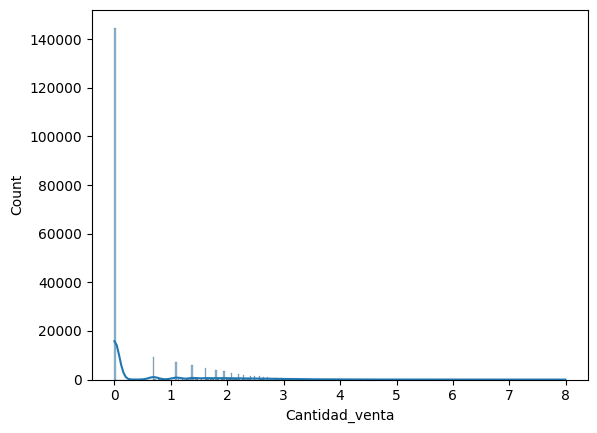

In [172]:
sns.histplot(np.log1p(df['Cantidad_venta']), kde=True)

<Axes: xlabel='Precio_medio_venta', ylabel='Count'>

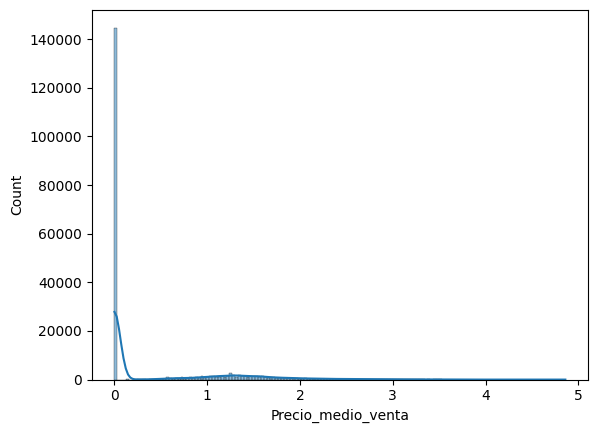

In [173]:
sns.histplot(np.log1p(df['Precio_medio_venta']), kde=True)

<Axes: xlabel='Coste_compra', ylabel='Count'>

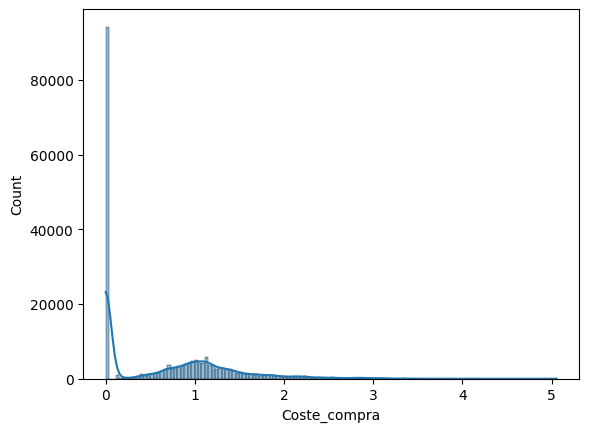

In [174]:
sns.histplot(np.log1p(df['Coste_compra']), kde=True)

## Ahora si analicemos los datos y su comportamiento por tipo de producto, categoria, proveedor, coste de compra y precio de venta durante los años 2021 y 2022.

In [175]:
products_groupby =df.groupby(["Tipo_producto", 'Categoria_producto','Proveedor_producto','Nombre_producto'],as_index=True).agg({
    k: ['mean','std','median']for k in [
        'Coste_compra', 'Precio_medio_venta', 'Cantidad_venta']})
products_groupby

Coste_compra  \
                                                                                                                                                                     mean   
Tipo_producto   Categoria_producto                                 Proveedor_producto                     Nombre_producto                                                   
Convencional    Droguería, Perfumería, Limpieza, Higiene, Hogar... (DICHA & HECHO) ANA GUERRERO ALONSO    Estropajo vegetal Dicha&Hecho 1 ud                     1.887727   
                                                                                                          Spray limpiabaños Dicha&Hecho 1 ud                     1.060000   
                                                                                                          Spray multisuperficies y limpiacristales ecológ...     1.060385   
                                                                   (GM FOOD) TRANSGOURMET IBERICA, S.A.U. Bayeta microfibra Mical 3 ud                           1.599091   
                                                                                                          Bayeta multiusos Mical 3 ud                            0.400769   
...                                                                                                                                                                   ...   
Falta completar Falta completar                                    Falta completar                        patata roja AgroEc.                                    0.000000   
                                                                                                          proteina de guisante texturizada Vegetalia 250g        0.000000   
                                                                                                          tomate seco unidad AgroEc                              0.000000   
                                                                                                          vinagre balsamico Ecovinal 500 ml                      0.000000   
                                                                                                          Ácido cítrico Ecodoo 350 gr                            0.000000   

                                                                                                                                                                        \
                                                                                                                                                                   std   
Tipo_producto   Categoria_producto                                 Proveedor_producto                     Nombre_producto                                                
Convencional    Droguería, Perfumería, Limpieza, Higiene, Hogar... (DICHA & HECHO) ANA GUERRERO ALONSO    Estropajo vegetal Dicha&Hecho 1 ud                  0.108888   
                                                                                                          Spray limpiabaños Dicha&Hecho 1 ud                  0.067823   
                                                                                                          Spray multisuperficies y limpiacristales ecológ...  0.088067   
                                                                   (GM FOOD) TRANSGOURMET IBERICA, S.A.U. Bayeta microfibra Mical 3 ud                        0.053750   
                                                                                                          Bayeta multiusos Mical 3 ud                         0.002774   
...                                                                                                                                                                ...   
Falta completar Falta completar                                    Falta completar                        patata roja AgroEc.                                 0.000000   
                                  

In [176]:
df.groupby('Categoria_producto').sum()

/var/folders/2z/y9k9szx937n84ztg148l8rd00000gn/T/ipykernel_54352/3904953780.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Categoria_producto').sum()


,Categoria_main_ID,Categoria_ID,Tipo_producto_ID,Proveedor_ID,Coste_compra,Mes_compra,Año_compra,Cantidad_venta,Precio_medio_venta,Año_ventas,Mes_ventas
Categoria_producto,,,,,,,,,,,
"Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Acccesorios de limpieza",457,457,618,1142,723.35,2882,923760,0.0,0.0,0,0
"Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Insecticidas",9,18,9,30,25.97,58,18192,0.0,0.0,0,0
"Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Jabón y detergente",362,1086,538,1361,1329.04,2247,731712,0.0,0.0,0,0
"Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Otros",258,1032,410,1758,302.90,1558,521510,0.0,0.0,0,0
"Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Productos de limpieza",787,3935,1043,2386,1667.33,4896,1590788,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
"Seco Envasado / Vinos, cervezas, sidras / Sidras",798,14364,187,812,446.73,769,230424,0.0,0.0,0,0
"Seco Envasado / Vinos, cervezas, sidras / Vinos",7357,133477,1780,79678,4088.51,6820,2124412,0.0,0.0,0,0
"Seco Envasado / Zumos, leche y bebidas vegetales / Bebidas vegetales",9660,176640,2400,30573,1934.44,8954,2789416,0.0,0.0,0,0


In [177]:
def annot_plot(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False) 
    for p in ax.patches:
        ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
                   ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords="offset points")

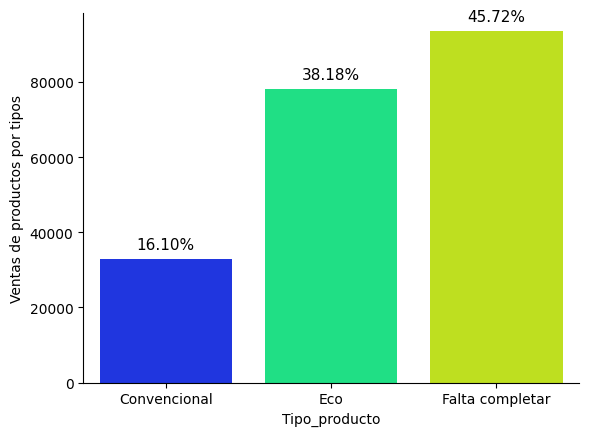

In [178]:
ax = sns.countplot(x="Tipo_producto",data=df, palette="gist_rainbow_r")
plt.ylabel("Ventas de productos por tipos")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
plt.show()

In [179]:
df.columns

Index(['ID_producto', 'Nombre_producto', 'Categoria_principal',
       'Categoria_main_ID', 'Categoria_producto', 'Categoria_ID',
       'Tipo_producto', 'Tipo_producto_ID', 'Proveedor_producto',
       'Proveedor_ID', 'Coste_compra', 'Fecha_compra', 'Mes_compra',
       'Año_compra', 'Cantidad_venta', 'Precio_medio_venta', 'Fecha_venta',
       'Año_ventas', 'Mes_ventas'],
      dtype='object')

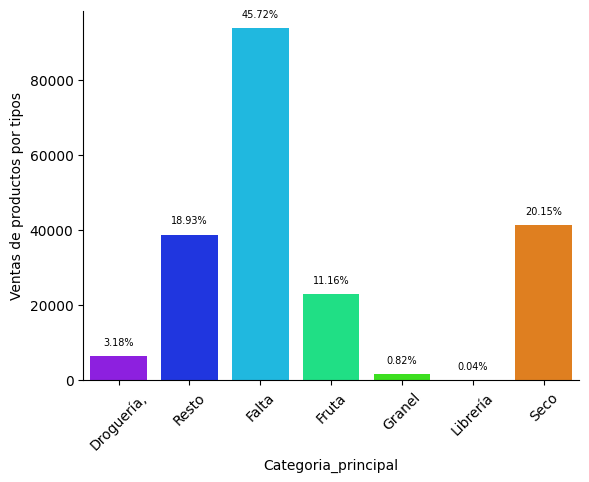

In [180]:
ax = sns.countplot(x="Categoria_principal",data=df, palette="gist_rainbow_r")
plt.ylabel("Ventas de productos por tipos")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=7,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
plt.xticks(rotation=45)
plt.show()

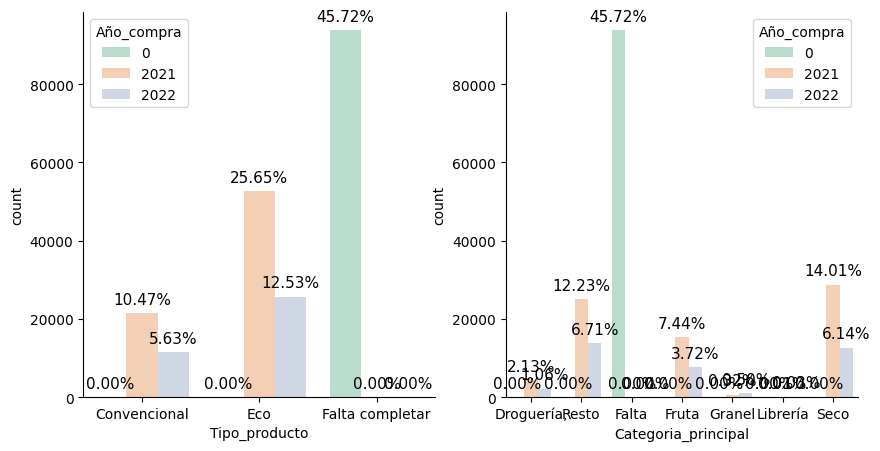

In [181]:
coveriables=["Tipo_producto","Categoria_principal"]
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
for i,item in enumerate(coveriables): 
    plt.subplot(1,2,(i+1))
    ax = sns.countplot(x=item,hue="Año_compra",data=df,palette="Pastel2")
    plt.xlabel(str(item))
    #plt.title("stroke by "+str(item))
    i=i+1
    annot_plot(ax)
plt.show()

In [182]:
df.columns

Index(['ID_producto', 'Nombre_producto', 'Categoria_principal',
       'Categoria_main_ID', 'Categoria_producto', 'Categoria_ID',
       'Tipo_producto', 'Tipo_producto_ID', 'Proveedor_producto',
       'Proveedor_ID', 'Coste_compra', 'Fecha_compra', 'Mes_compra',
       'Año_compra', 'Cantidad_venta', 'Precio_medio_venta', 'Fecha_venta',
       'Año_ventas', 'Mes_ventas'],
      dtype='object')

In [184]:
product_type_sales_per_month = df.groupby(['Fecha_venta', 'Nombre_producto']).aggregate({'Cantidad_venta': 'sum'}).unstack().resample('1M').sum()
product_type_sales_per_month.plot(figsize=(21,5))
plt.legend(bbox_to_anchor=(1, -.2), ncol=6)
plt.title("product_type_sales_per_month")

TypeError: '<' not supported between instances of 'Timestamp' and 'str'

In [26]:
# Utilizando seaborn
'''sns.lineplot(x='Fecha', y='Coste', data=precios_compra_2022, hue='Producto_nombre')
plt.xlabel('Fecha')
plt.ylabel('Coste')
plt.title('Coste del producto a lo largo del tiempo')'''

"sns.lineplot(x='Fecha', y='Coste', data=precios_compra_2022, hue='Producto_nombre')\nplt.xlabel('Fecha')\nplt.ylabel('Coste')\nplt.title('Coste del producto a lo largo del tiempo')"

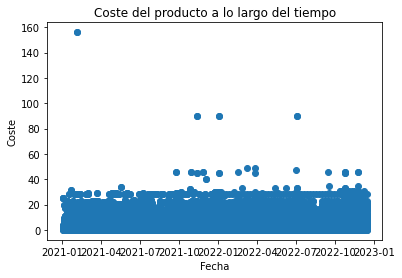

In [27]:
plt.scatter(precios_compra_2022['Fecha'], precios_compra_2022['Coste'])
plt.xlabel('Fecha')
plt.ylabel('Coste')
plt.title('Coste del producto a lo largo del tiempo')
plt.show()